In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from object_detection.data_decoders.tf_example_decoder import TfExampleDecoder

In [2]:
record_iterator = tf.python_io.tf_record_iterator(path='../images/train-00000-of-00010')
decoder = TfExampleDecoder()

In [3]:
# get label in the record
def decode_string(data_string):
    example = tf.train.Example()
    example.ParseFromString(data_string)
    return example

example = decode_string(data_string)
print(example.features.feature['image/object/class/text'])

In [4]:
data_string = next(record_iterator)
tensor_dict = decoder.decode(data_string)

In [6]:
tensor_dict

{'image': <tf.Tensor 'case/cond/Merge:0' shape=(?, ?, 3) dtype=uint8>,
 'source_id': <tf.Tensor 'Reshape_6:0' shape=() dtype=string>,
 'key': <tf.Tensor 'Reshape_5:0' shape=() dtype=string>,
 'filename': <tf.Tensor 'Reshape_2:0' shape=() dtype=string>,
 'groundtruth_boxes': <tf.Tensor 'transpose:0' shape=(?, 4) dtype=float32>,
 'groundtruth_area': <tf.Tensor 'SparseToDense:0' shape=(8,) dtype=float32>,
 'groundtruth_is_crowd': <tf.Tensor 'Cast:0' shape=(8,) dtype=bool>,
 'groundtruth_difficult': <tf.Tensor 'SparseToDense_2:0' shape=(0,) dtype=int64>,
 'groundtruth_group_of': <tf.Tensor 'SparseToDense_3:0' shape=(0,) dtype=int64>,
 'groundtruth_weights': <tf.Tensor 'cond/Merge:0' shape=(?,) dtype=float32>,
 'groundtruth_classes': <tf.Tensor 'SparseToDense_5:0' shape=(0,) dtype=int64>,
 'groundtruth_image_classes': <tf.Tensor 'SparseToDense_6:0' shape=(0,) dtype=int64>,
 'original_image_spatial_shape': <tf.Tensor 'strided_slice:0' shape=(2,) dtype=int32>}

In [14]:
with tf.Session() as sess:
    image = tensor_dict['image'].eval()

In [10]:
image.shape

(321, 500, 3)

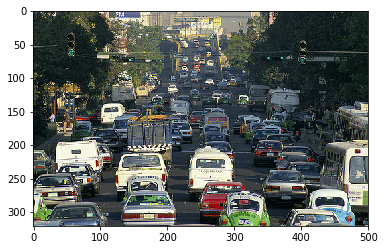

In [11]:
plt.imshow(output)